In [ ]:
# Install OpenCV
!pip install opencv-python opencv-python-headless


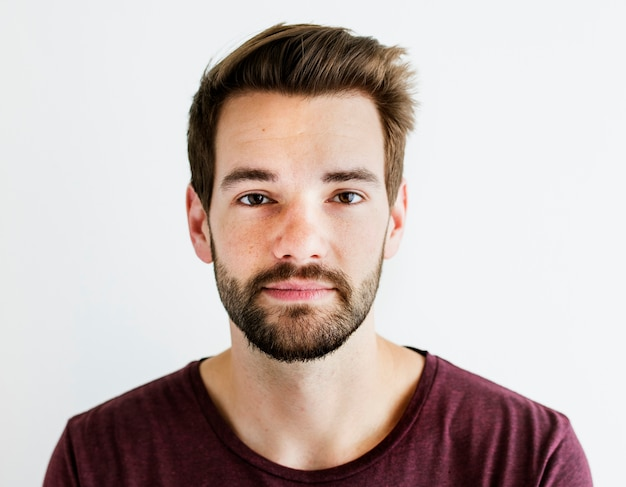

In [ ]:
import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow


image_url = 'https://img.freepik.com/free-photo/portrait-white-man-isolated_53876-40306.jpg'


response = requests.get(image_url, stream=True)
response.raise_for_status()

image_array = np.asarray(bytearray(response.content), dtype="uint8")


image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)



if image is None:
    print("Error loading image.")
else:

    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Saving image.png to image.png


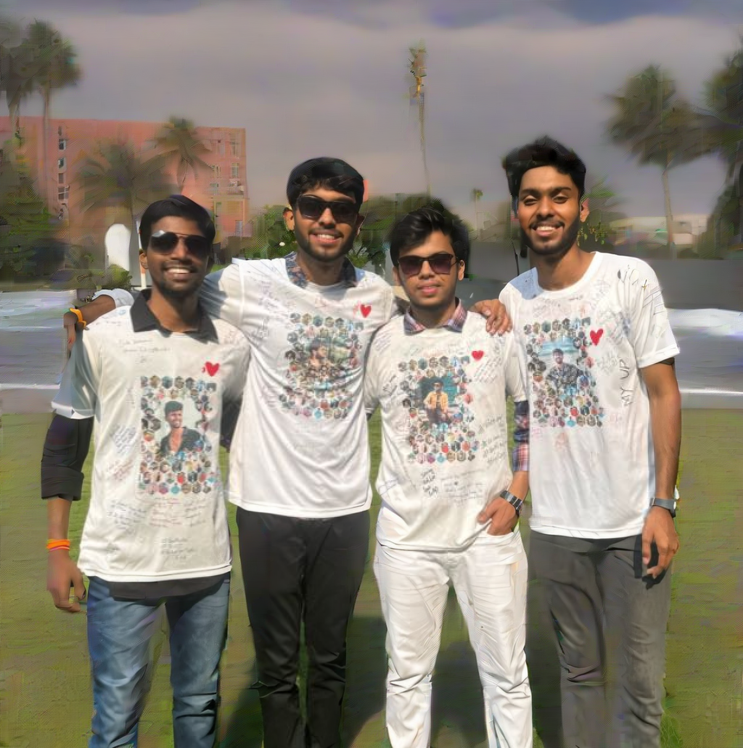

In [ ]:
from google.colab import files
uploaded = files.upload()


image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

cv2_imshow(image)


In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml


--2024-10-29 06:17:05--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2024-10-29 06:17:05 (20.7 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]



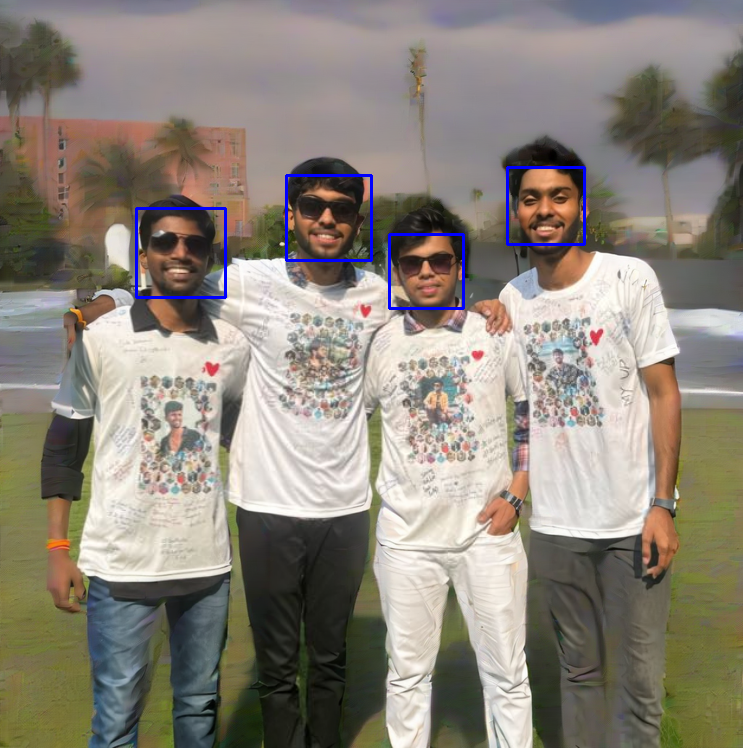

In [ ]:

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

cv2_imshow(image)


In [ ]:
!wget -O deploy.prototxt https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/master/deploy.prototxt # Download deploy.prototxt as a raw file with specified file name
!wget -O mobilenet_iter_73000.caffemodel https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/master/mobilenet_iter_73000.caffemodel # Download mobilenet_iter_73000.caffemodel as a raw file with specified file name



--2024-10-29 06:17:17--  https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/master/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44667 (44K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  43.62K  --.-KB/s    in 0.01s   

2024-10-29 06:17:17 (4.36 MB/s) - ‘deploy.prototxt’ saved [44667/44667]

--2024-10-29 06:17:17--  https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/master/mobilenet_iter_73000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2

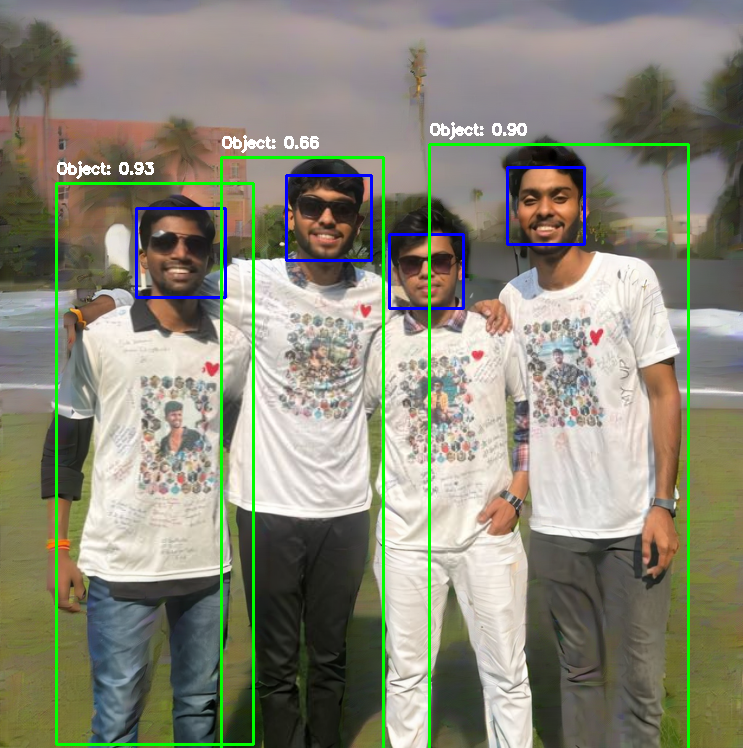

In [ ]:
net = cv2.dnn.readNetFromCaffe('deploy.prototxt', 'mobilenet_iter_73000.caffemodel')


(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

net.setInput(blob)


detections = net.forward()

for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        label = f"Object: {confidence:.2f}"
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
        cv2.putText(image, label, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

from google.colab.patches import cv2_imshow
cv2_imshow(image)

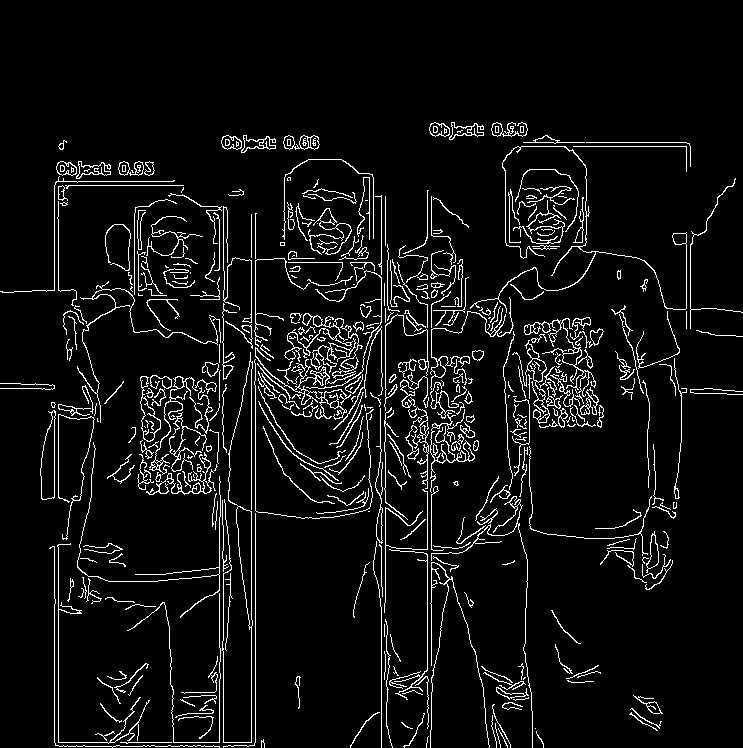

In [ ]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred = cv2.GaussianBlur(gray, (5, 5), 0)


edges = cv2.Canny(blurred, 50, 150)


cv2_imshow(edges)
